In [13]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import operator 
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [4]:
def get_mnist(flag, one_hot = True):
    with np.load(f"./data/mnist.npz") as f:
            images, labels = f[f"x_{flag}"], f[f"y_{flag}"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    if one_hot == True:
        labels = np.eye(10)[labels]
    return images, labels

In [5]:
X_train, y_train = get_mnist("train", False)[:1000]
X_test, y_test = get_mnist("test", False)[:200]
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:200]
y_test = y_test[:200]
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    # init
    def __init__(self, K=3):
        self.K = K
        self.X_train = X_train
        self.y_train = y_train
    # fit    
    def fit(self, X_train, y_train):
            self.X_train = X_train
            self.y_train = y_train
            
    # predict
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.y_train[idx] in neigh_count:
                    neigh_count[self.y_train[idx]] += 1
                else:
                    neigh_count[self.y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 784) (1000,)
(200, 784) (200,)


In [7]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_train)
  acc = accuracy_score(y_train, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.954
K = 5; Accuracy: 0.929
K = 7; Accuracy: 0.914
K = 9; Accuracy: 0.901
K = 11; Accuracy: 0.894
K = 13; Accuracy: 0.886
K = 15; Accuracy: 0.874
K = 17; Accuracy: 0.865
K = 19; Accuracy: 0.865
K = 21; Accuracy: 0.853
K = 23; Accuracy: 0.848
K = 25; Accuracy: 0.841
K = 27; Accuracy: 0.841
K = 29; Accuracy: 0.835
K = 31; Accuracy: 0.834
K = 33; Accuracy: 0.831
K = 35; Accuracy: 0.825
K = 37; Accuracy: 0.824
K = 39; Accuracy: 0.823
K = 41; Accuracy: 0.816
K = 43; Accuracy: 0.817
K = 45; Accuracy: 0.81
K = 47; Accuracy: 0.805
K = 49; Accuracy: 0.802
K = 51; Accuracy: 0.801
K = 53; Accuracy: 0.798
K = 55; Accuracy: 0.8
K = 57; Accuracy: 0.795
K = 59; Accuracy: 0.794
K = 61; Accuracy: 0.794
K = 63; Accuracy: 0.792
K = 65; Accuracy: 0.784
K = 67; Accuracy: 0.783
K = 69; Accuracy: 0.783
K = 71; Accuracy: 0.777
K = 73; Accuracy: 0.773
K = 75; Accuracy: 0.775
K = 77; Accuracy: 0.77
K = 79; Accuracy: 0.763
K = 81; Accuracy: 0.761
K = 83; Accuracy: 0.758
K = 85; Accuracy: 0.753


In [8]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

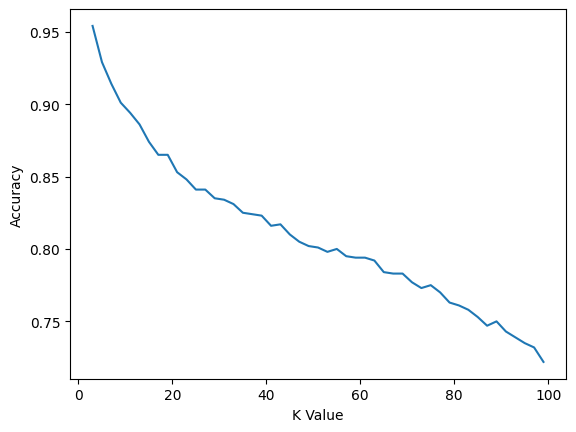

In [9]:
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [10]:
model = KNN(K = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [0.85       0.82352941 0.92307692 0.92307692 0.94736842 0.85
 1.         0.88       1.         0.63333333]

Recall 
 [1.         1.         0.75       0.75       0.64285714 0.85
 0.9        0.91666667 0.8        0.9047619 ]

F-score 
 [0.91891892 0.90322581 0.82758621 0.82758621 0.76595745 0.85
 0.94736842 0.89795918 0.88888889 0.74509804]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


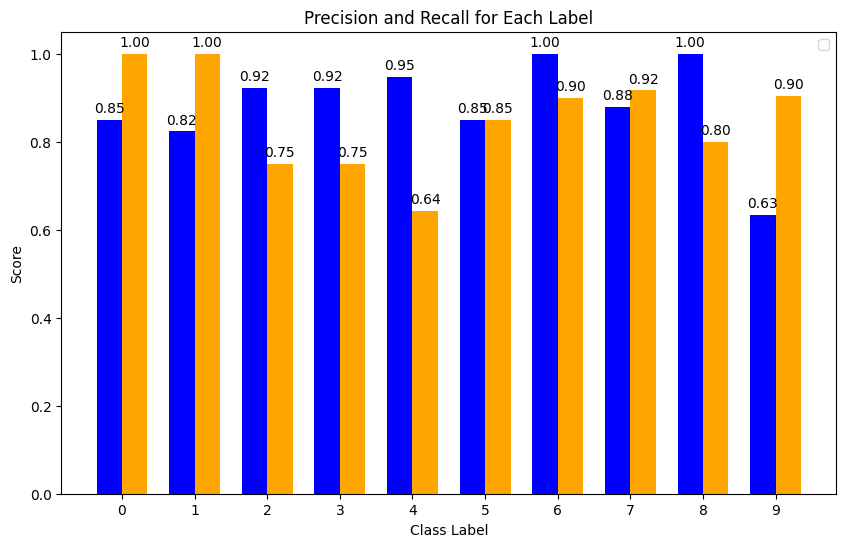

In [11]:
labels = np.unique(y_test)
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(labels - width/2, precision, width, color='blue')
bar2 = ax.bar(labels + width/2, recall, width, color='orange')

# Hiển thị giá trị trên mỗi cột
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_title('Precision and Recall for Each Label')
ax.set_xlabel('Class Label')
ax.set_ylabel('Score')
ax.set_xticks(labels)
ax.legend()
plt.show()

+ precision = 0.883
+ recall = 0.851
+ f1_score = 0.857


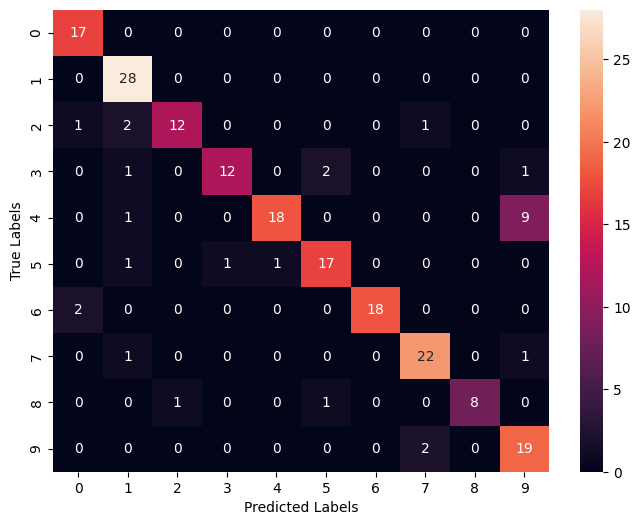

In [15]:


# y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_test, pred, average='macro')
cf = confusion_matrix(y_test,pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()